In [ ]:
suppressMessages(library(ArchR))
suppressMessages(library(Seurat))
suppressMessages(library(Signac))
suppressMessages(library(harmony))
suppressMessages(library(dplyr))
suppressMessages(library(cowplot))
suppressMessages(library(harmony))
suppressMessages(library(Nebulosa))
suppressMessages(library(ggpubr))
suppressMessages(library(Ipaper))
suppressMessages(library(phateR))
source("../../utils/stimATAC_analyses_code/R/utils.R")
source("../../utils/stimATAC_analyses_code/R/optMatching_functions.R")

In [ ]:
set.seed(42)
getwd()

In [ ]:
coembed <- readRDS("../data/coembed/coembed.annotation.trajectory.Rds")
coembed

In [ ]:
obj.atac <- subset(coembed, tech == "ATAC")
obj.rna <- subset(coembed, tech == "RNA")
obj.atac
obj.rna

In [ ]:
head(coembed@reductions$dm@cell.embeddings)

In [ ]:
cca_umap_df <- as.data.frame(coembed@reductions$umap_harmony_v2@cell.embeddings)
colnames(cca_umap_df) <- c("UMAP1", "UMAP2")
head(cca_umap_df)



Constructing KNN graph for computing geodesic distance ..
Computing graph-based geodesic distance ..
# KNN subgraphs detected:
 1 
Visualizing subgraph for cells based on original CCA UMAP coords provided..
Skipping subgraphs with either ATAC/RNA cells fewer than:  50  ..
Pairing cells for subgraph No. 1 
Total ATAC cells in subgraph:  5649 
Total RNA cells in subgraph:  37914 
Subgraph size:  5649 
Search threshold being used:  2260 
[1] "Constructing KNN based on geodesic distance to reduce search pairing search space"
[1] "Number of cells being paired: 5649 ATAC and 5649  RNA cells"
Determing pairs through optimized bipartite matching ..
Assembling pair list ..
Finished!


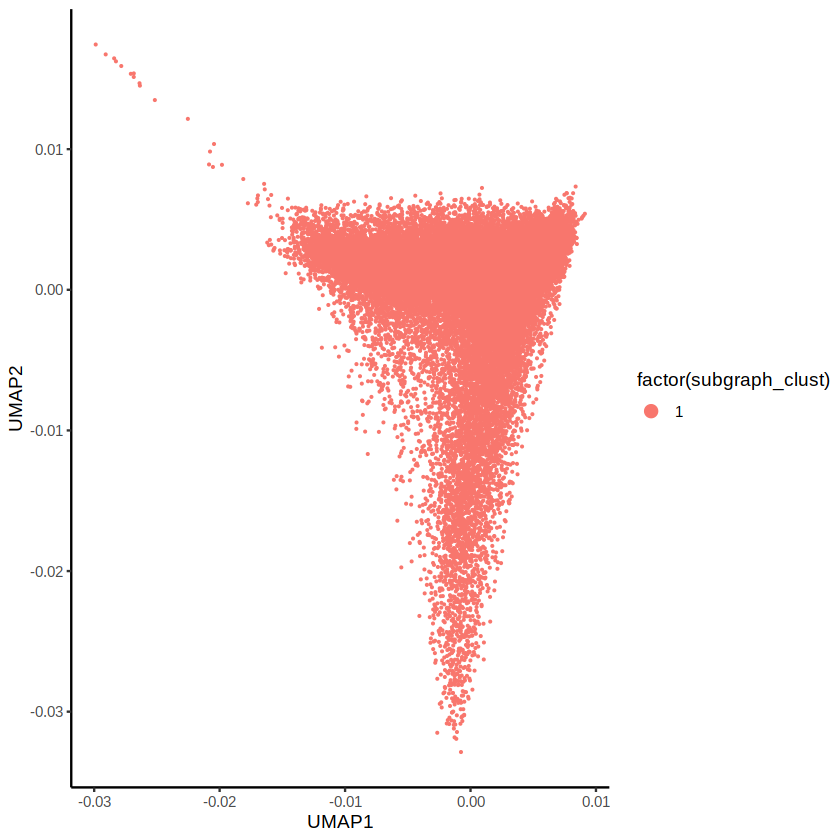

In [8]:
options(repr.plot.height = 6, repr.plot.width = 6)

df_cell_pairing <- cell_pairing(ATACpcs = obj.atac@reductions$harmony@cell.embeddings,
                               RNApcs = obj.rna@reductions$harmony@cell.embeddings,
                               cca_umap_df = cca_umap_df,
                               nCores = 80)

In [ ]:
sel_cells <- c(df_cell_pairing$ATAC, df_cell_pairing$RNA)
coembed.sub <- coembed[, sel_cells]

options(repr.plot.height = 5, repr.plot.width = 10)
DimPlot(coembed.sub, reduction = "umap_harmony_v2", group.by = "annotation", split.by = "tech")

In [ ]:
df_cell_pairing$cell_name <- paste0("cell-", 1:nrow(df_cell_pairing))

In [ ]:
saveRDS(df_cell_pairing, "../data/coembed/ATAC_RNA_matching.rds")

In [ ]:
sessionInfo()